# Background

The COVID-19 pandemic in Australia is part of the ongoing worldwide pandemic of the coronavirus disease 2019 (COVID-19). The first confirmed case in Australia was identified on January 25, 2020 in Victoria. The Australian Federal Government has been gathering information regarding the pandemic in the country since then, and this data is valuable in helping various agencies make decisions regarding public policies.

This project aims to give an overview of Covid-19 situation using statistical and data visualisation techniques. Specific suggestions are provided at last to help develop public policies for controlling the spread of the pandemic. 

# Data description

Datasets are downloaded from Matt Bolton’s GitHub repository https://github.com/M3IT/COVID-19_Data/tree/master/Data. 6 data files are loaded into the dataframe and used to conduct data analysis. Data are collected from 1st January, 2020 to 31st March, 2022. Daily change and cumulative counts at both state level and national level, deaths and population information are collected from these datasets. Specific variables include confimed cases, deaths, tests, positive tests, recovered cases, hospitalised cases, cases in ICU, cases on a ventilator and population. 

# 1. Data overview and statistics


In [16]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## 1.1 National data
### 1.1.1 national_cumulative

In [3]:
df_national_cumulative = pd.read_csv('/COVID_AU_national_cumulative.csv')
df_national_cumulative.head()


,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,4,0,0,0,0,0,0,0,0
1,2020-01-26,4,0,0,0,0,0,0,0,0
2,2020-01-27,5,0,0,0,0,0,0,0,0
3,2020-01-28,5,0,0,0,0,0,0,0,0
4,2020-01-29,9,0,0,0,0,0,0,0,0


In [4]:
df_national_cumulative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       797 non-null    object
 1   confirmed  797 non-null    int64 
 2   deaths     797 non-null    int64 
 3   tests      797 non-null    int64 
 4   positives  797 non-null    int64 
 5   recovered  797 non-null    int64 
 6   hosp       797 non-null    int64 
 7   icu        797 non-null    int64 
 8   vent       797 non-null    int64 
 9   vaccines   797 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 62.4+ KB


In [5]:
df_national_cumulative.tail(1)

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
796,2022-03-31,4322777,5999,66496040,4322777,311270,2492,90,27,56359439


In [6]:
# Calculate recover rate and death rate
print('Recover rate: {:.2%}'.format(df_national_cumulative.loc[796,'recovered']
                                    /df_national_cumulative.loc[796,'confirmed']))
print('Death rate: {:.2%}'.format(df_national_cumulative.loc[796,'deaths']
                                    /df_national_cumulative.loc[796,'confirmed']))

Recover rate: 7.20%
Death rate: 0.14%


* Observation:

1. There are 10 variables in "national_cumulative" dataset. 
2. By 31st March, a total of 4,322,777 positive Covid-19 cases are confirmed in Australia. 
3. Recover rate is 7.2% and death rate is 0.14%. 
4. The number of cases in ICU is 90 and the number of cases on a ventilator is 27 in total.
5. 56,359,439 people in Australia get vaccinated.

### 1.1.2 national_daily_change

In [8]:
df_national_daily = pd.read_csv('/COVID_AU_national_daily_change.csv')
df_national_daily.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,4,0,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,0,0,0,0,0,0,0,0


In [9]:
df_national_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       797 non-null    object
 1   confirmed  797 non-null    int64 
 2   deaths     797 non-null    int64 
 3   tests      797 non-null    int64 
 4   positives  797 non-null    int64 
 5   recovered  797 non-null    int64 
 6   hosp       797 non-null    int64 
 7   icu        797 non-null    int64 
 8   vent       797 non-null    int64 
 9   vaccines   797 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 62.4+ KB


In [10]:
df_national_daily.describe()

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,5423.810540,7.526976,83432.923463,5423.775408,390.552070,3.129235,0.112923,0.033877,70714.478043
std,19343.865023,15.560898,72723.504939,19433.632666,2406.041035,51.397746,6.383065,4.255367,101570.858395
min,-9080.000000,0.000000,0.000000,-39113.000000,-121.000000,-289.000000,-34.000000,-26.000000,0.000000
25%,11.000000,0.000000,32561.000000,11.000000,3.000000,-4.000000,-1.000000,0.000000,0.000000
50%,32.000000,0.000000,54425.000000,32.000000,11.000000,0.000000,0.000000,0.000000,20.000000
75%,1242.000000,8.000000,127343.000000,1239.000000,88.000000,5.000000,1.000000,0.000000,125035.000000
max,282922.000000,98.000000,392081.000000,281758.000000,54490.000000,368.000000,70.000000,33.000000,567556.000000


* Observation
1. It has the same 10 variables as "national_cumulative" dataset.
2. On average, 5424 people was confirmed as postive, 8 people dead due to COVID-19 and 391 people recovered every day.
3. 6 variables have abnormal negative numbers. This issue could be caused by data collection method. 

## 1.2 State data
### 1.2.1 state_cumulative

In [11]:
df_state_cumulative = pd.read_csv('/COVID_AU_state_cumulative.csv')
df_state_cumulative.head()

,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,Australian Capital Territory,ACT,0,0,0,0,0,0,0,0,0
1,2020-01-25,New South Wales,NSW,3,0,0,0,0,0,0,0,0
2,2020-01-25,Northern Territory,NT,0,0,0,0,0,0,0,0,0
3,2020-01-25,Queensland,QLD,0,0,0,0,0,0,0,0,0
4,2020-01-25,South Australia,SA,0,0,0,0,0,0,0,0,0


In [12]:
# Check state values
print(df_state_cumulative['state_abbrev'].unique())

['ACT' 'NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']


In [13]:
# Compare confirmed and other cases among states
df_state_cumulative = df_state_cumulative.tail(8).sort_values('confirmed', ascending = False)
df_state_cumulative

,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
6369,2022-03-31,New South Wales,NSW,1637232,2067,29846083,1637232,2802,1326,39,16,17508486
6374,2022-03-31,Victoria,VIC,1282714,2764,19982645,1282714,294076,312,14,4,14864933
6371,2022-03-31,Queensland,QLD,754723,742,7092300,754723,2210,362,16,5,10675454
6372,2022-03-31,South Australia,SA,256622,263,4230153,256622,1980,175,8,1,3881039
6375,2022-03-31,Western Australia,WA,174341,51,3020522,174341,1257,219,6,0,6157095
6373,2022-03-31,Tasmania,TAS,89488,31,601135,89488,225,29,2,0,1266212
6368,2022-03-31,Australian Capital Territory,ACT,77731,42,981468,77731,8438,47,3,1,1455289
6370,2022-03-31,Northern Territory,NT,49926,39,741734,49926,282,22,2,0,550931


In [14]:
# Compare recover rate among states
df_state_cumulative['recover_rate %'] = round(df_state_cumulative['recovered']/df_state_cumulative['confirmed'] * 100, 2) 
df_state_cumulative[['state', 'recover_rate %']].sort_values('recover_rate %', ascending = False)

,state,recover_rate %
6374,Victoria,22.93
6368,Australian Capital Territory,10.86
6372,South Australia,0.77
6375,Western Australia,0.72
6370,Northern Territory,0.56
6371,Queensland,0.29
6373,Tasmania,0.25
6369,New South Wales,0.17


In [15]:
# Compare death rate among states
df_state_cumulative['death_rate %'] = round(df_state_cumulative['deaths']/df_state_cumulative['confirmed'] * 100, 2) 
df_state_cumulative[['state', 'death_rate %']].sort_values('death_rate %', ascending = False)

,state,death_rate %
6374,Victoria,0.22
6369,New South Wales,0.13
6371,Queensland,0.10
6372,South Australia,0.10
6370,Northern Territory,0.08
6368,Australian Capital Territory,0.05
6375,Western Australia,0.03
6373,Tasmania,0.03


* Observation:

1. This dataset collected Covid-19 Data across eight states. There are 10 variables in this dataset.
2. New South Wales and Victoria appear to experience most serious outbreaks of Covid-19, having much more confirmed and deaths cases than the other states. 
3. The recover rate of Victoria and Australian Capital Territory is significantly higher than the other states.
4. Victoria shows the highest death rate in the country.

### 1.2.2 state_daily_change

In [17]:
df_state_daily = pd.read_csv('/COVID_AU_state_daily_change.csv')
df_state_daily.head()

,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
0,2020-01-25,Australian Capital Territory,ACT,0,0,0,0,0,0,0,0,0
1,2020-01-25,New South Wales,NSW,3,0,0,0,0,0,0,0,0
2,2020-01-25,Northern Territory,NT,0,0,0,0,0,0,0,0,0
3,2020-01-25,Queensland,QLD,0,0,0,0,0,0,0,0,0
4,2020-01-25,South Australia,SA,0,0,0,0,0,0,0,0,0


In [18]:
df_state_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          6376 non-null   object
 1   state         6376 non-null   object
 2   state_abbrev  6376 non-null   object
 3   confirmed     6376 non-null   int64 
 4   deaths        6376 non-null   int64 
 5   tests         6376 non-null   int64 
 6   positives     6376 non-null   int64 
 7   recovered     6376 non-null   int64 
 8   hosp          6376 non-null   int64 
 9   icu           6376 non-null   int64 
 10  vent          6376 non-null   int64 
 11  vaccines      6376 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 597.9+ KB


In [19]:
df_state_daily.describe()

,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines
count,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000,6376.000000
mean,677.976317,0.940872,10429.115433,677.971926,48.819009,0.391154,0.014115,0.004235,8839.309755
std,5124.802471,3.784814,21415.044639,5146.760743,797.027592,13.683117,1.903587,1.433541,19527.594437
min,-24042.000000,0.000000,-31688.000000,-24296.000000,-130.000000,-222.000000,-17.000000,-26.000000,-61386.000000
25%,0.000000,0.000000,574.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,2734.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.000000,10123.250000,9.000000,1.000000,0.000000,0.000000,0.000000,7122.500000
max,255050.000000,59.000000,311083.000000,254825.000000,47688.000000,218.000000,51.000000,30.000000,175636.000000


## 1.3 Deaths data

In [20]:
# Load data
df_deaths = pd.read_csv('/COVID_AU_deaths.csv')
df_deaths.head()

,date,state,age,age_bracket,gender,dd,state_cumulative
0,2020-03-01,WA,78.0,70-79,Male,70,1
1,2020-03-04,NSW,95.0,90-99,Female,90,1
2,2020-03-08,NSW,82.0,80-89,Male,80,2
3,2020-03-13,QLD,77.0,70-79,Female,70,1
4,2020-03-15,NSW,77.0,70-79,Female,70,3


In [21]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5999 non-null   object 
 1   state             5999 non-null   object 
 2   age               83 non-null     float64
 3   age_bracket       2121 non-null   object 
 4   gender            2076 non-null   object 
 5   dd                2261 non-null   object 
 6   state_cumulative  5999 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 328.2+ KB


In [22]:
df_deaths.describe()

,age,state_cumulative
count,83.000000,5999.000000
mean,76.204819,1045.571262
std,20.306048,771.797267
min,2.000000,1.000000
25%,74.000000,358.500000
50%,80.000000,916.000000
75%,89.000000,1666.000000
max,101.000000,2764.000000


In [23]:
# Check missing values
df_deaths.isnull().sum()

date                   0
state                  0
age                 5916
age_bracket         3878
gender              3923
dd                  3738
state_cumulative       0
dtype: int64

In [24]:
# Check state
df_deaths['state'].unique()

array(['WA', 'NSW', 'QLD', 'VIC', 'TAS', 'ACT', 'SA', 'NT'], dtype=object)

In [25]:
# Check deaths by gender
df_deaths['gender'].value_counts()

Male       864
Female     745
Unknown    320
Male*       89
Female*     58
Name: gender, dtype: int64

In [26]:
# Check gender types
df_deaths.gender.unique()

array(['Male', 'Female', nan, 'Male*', 'Female*', 'Unknown'], dtype=object)

In [27]:
# Check deaths by age bracket
df_deaths['age_bracket'].value_counts()

80-89      743
90-99      459
70-79      442
60-69      238
50-59      123
40-49       48
30-39       29
100-109     21
20-29       10
10-19        3
-1-8         3
0-9          2
Name: age_bracket, dtype: int64

* Observation:
1. There are 7 variables in this dataset. The dataset records each death case from 8 states.
2. The average age of deaths is 76. The number of deaths increase with age. People at 80-89 age seem to be most vulnerable to Covid-19, as most death cases appear in this age group. 
3. There are missing values in the variables related to age and gender.
4. There are abnormal gender types in the gender variable such as Male* and Female* and several data of gender are unknown. 
5. There is an age bracket of '-1-8' which could be typing errors.

## 1.4 Population data

In [28]:
# Load data
df_population = pd.read_csv('/COVID_Data_Hub.csv')
df_population.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,people_vaccinated,people_fully_vaccinated,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id
0,2020-01-25,4,0,0,0,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
1,2020-01-26,4,0,0,0,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
2,2020-01-27,5,0,0,0,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
3,2020-01-28,5,0,0,0,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
4,2020-01-29,9,0,0,0,0,0,0,0,0,0,0,25459470,1,Australia,NaN,NaN,99999999


In [29]:
# Total population
df_population_Australia = df_population[['administrative_area_level_1','population']].head(1)
total_population = df_population_Australia['population'][0]
print('Total population of Australia is:', total_population)

Total population of Australia is: 25459470


In [30]:
# Population by state
df_population_state = df_population[['administrative_area_level_2','population']].tail(8).sort_values('population', ascending = False)
df_population_state.rename(columns = {'administrative_area_level_2':'state'}, inplace = True)
df_population_state['population %'] = round(df_population_state['population'] / total_population * 100, 2)
df_population_state

,state,population,population %
7166,New South Wales,8117976,31.89
7171,Victoria,6629870,26.04
7168,Queensland,5115451,20.09
7172,Western Australia,2630557,10.33
7169,South Australia,1756494,6.90
7170,Tasmania,535500,2.10
7165,Australian Capital Territory,428060,1.68
7167,Northern Territory,245562,0.96


* Observation:

1. Among all states, New South Wales have the largest population and Victoria ranks the second.
2. Northern Territory has the smallest population.

# 2 Visualisation

## 2.1 Box plot - Gender and age
A boxplot is a standardised method of visualising data distribution using a five summary. Several boxplots are created to display age distribution in different categories.

### 2.1.1 Data preparation 

In [31]:
df_deaths.head()

,date,state,age,age_bracket,gender,dd,state_cumulative
0,2020-03-01,WA,78.0,70-79,Male,70,1
1,2020-03-04,NSW,95.0,90-99,Female,90,1
2,2020-03-08,NSW,82.0,80-89,Male,80,2
3,2020-03-13,QLD,77.0,70-79,Female,70,1
4,2020-03-15,NSW,77.0,70-79,Female,70,3


In [32]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5999 non-null   object 
 1   state             5999 non-null   object 
 2   age               83 non-null     float64
 3   age_bracket       2121 non-null   object 
 4   gender            2076 non-null   object 
 5   dd                2261 non-null   object 
 6   state_cumulative  5999 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 328.2+ KB


In [33]:
df_deaths.isnull().sum()

date                   0
state                  0
age                 5916
age_bracket         3878
gender              3923
dd                  3738
state_cumulative       0
dtype: int64

It is observed that there are a huge amount of missing values in deaths dataset. Despite huge missing values, age and gender are worth investigating since they are important demographic features. People within the same age group or gender group may have similar patterns after testing positive to Covid-19.

In [35]:
# Clean gender data
def clean_gender(x):
    if x == 'Male*':
        return 'Unknown'
    elif x == 'Female*':
        return 'Unknown'
    else:
        return x

df_deaths['gender'] = df_deaths['gender'].map(clean_gender)    

Since ‘dd’ has much more non-null observations than ‘age’, this variable is used to approximate the true age. To make the value of this variable closer to the true age, I add 5 to each value in ‘dd’ column, which is the middle number of corresponding age bracket.

In [34]:
# Check 'dd' column
df_deaths['dd'].unique()

array(['70', '90', '80', '60', '50', '40', '100', '30', '20', nan, '10-1',
       'Not reporte', '10', 'Unknow', '0-'], dtype=object)

In [36]:
# Select data using 'dd' column
# https://stackoverflow.com/questions/36410075/select-rows-from-a-dataframe-based-on-multiple-values-in-a-column-in-pandas
df_deaths = df_deaths[df_deaths['dd'].isin(['70','90', '80', '60', '50', '40', '100', '30', '20','10'])]

# Convert 'dd' data type to int and replace 'age' with 'dd'
df_deaths['age'] = df_deaths['dd'].astype(int) + 5   # dd is the lowest number of age_bracket, so adding 5 is closer to true age values.  

#https://datatofish.com/string-to-integer-dataframe/
df_deaths

,date,state,age,age_bracket,gender,dd,state_cumulative
0,2020-03-01,WA,75,70-79,Male,70,1
1,2020-03-04,NSW,95,90-99,Female,90,1
2,2020-03-08,NSW,85,80-89,Male,80,2
3,2020-03-13,QLD,75,70-79,Female,70,1
4,2020-03-15,NSW,75,70-79,Female,70,3
...,...,...,...,...,...,...,...
5932,2022-03-29,SA,85,80-89,Female,80,261
5964,2022-03-30,NT,65,60-69,Female,60,38
5965,2022-03-30,SA,75,70-79,Male,70,262
5966,2022-03-30,SA,85,80-89,Female,80,263


### 2.1.2 Box plot for age of deaths

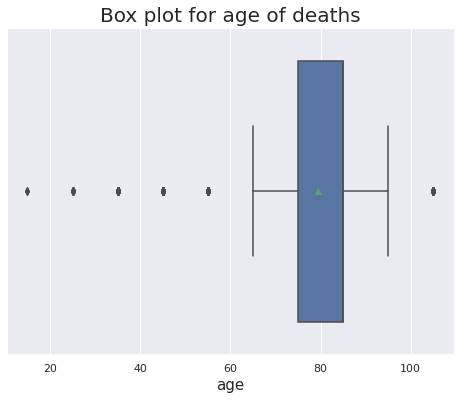

In [37]:
# Create box plot
#https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
#https://stackoverflow.com/questions/54132989/is-there-a-way-to-change-the-color-and-shape-indicating-the-mean-in-a-seaborn-bo

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.boxplot('age', data = df_deaths, showmeans = True)
ax.set_title('Box plot for age of deaths', size = 20)
ax.set_ylabel('', size = 15)
ax.set_xlabel('age', size = 15)

plt.savefig('fig1')
plt.show()



* Observation:
The box plot is comparatively short. This indicates that overall deaths happen among the elder group. The middle box represents the middle 50% of ages for death. 


### 2.1.3 Boxplot for age of deaths by gender

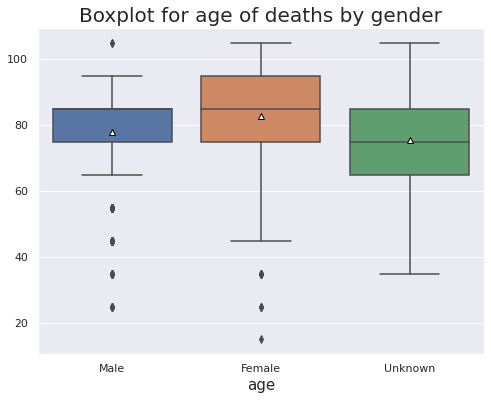

In [38]:
# Create boxplot
ax = sns.boxplot(x = 'gender', y = 'age', data = df_deaths, showmeans = True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title('Boxplot for age of deaths by gender', size = 20)
ax.set_ylabel('', size = 15)
ax.set_xlabel('age', size = 15)

plt.savefig('fig2')
plt.show()

* Observation:

1. The box plot shows that female group has a wider distribution of age than male group and it’s average age is higher than that of male group. 
2. The age of ‘Unknown’ group spreads from around 40 to 120.

### 2.1.4 Boxplot for age by state

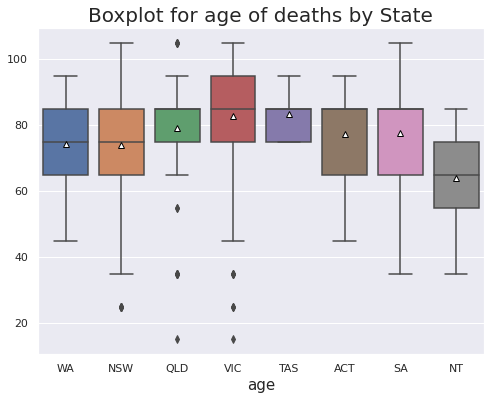

In [39]:
ax = sns.boxplot(x = 'state', y = 'age', data = df_deaths, showmeans = True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
ax.set_title('Boxplot for age of deaths by State', size = 20)
ax.set_ylabel('', size = 15)
ax.set_xlabel('age', size = 15)

plt.savefig('fig3')
plt.show()

* Observation:
1. New South Wales and South Australia have widest age distribution among the states.
2. Tasmania has the shortest age distribution, followed by Queensland.
3. Victoria and Tasmania have the highest average age number and Northern Territory	has the lowest average age number among the states.

## 2.2 Radar plot

### 2.2.1 Calculate several ratios

In [40]:
# Add population information to df_state_cumulative
df_state_cumulative2 = pd.merge(df_state_cumulative, df_population_state, how = 'inner', on = 'state')
df_state_cumulative2 = df_state_cumulative2[df_state_cumulative2['date'] == '2022-03-31']
df_state_cumulative2 = df_state_cumulative2.sort_values('population', ascending = False)
df_state_cumulative2

,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,recover_rate %,death_rate %,population,population %
0,2022-03-31,New South Wales,NSW,1637232,2067,29846083,1637232,2802,1326,39,16,17508486,0.17,0.13,8117976,31.89
1,2022-03-31,Victoria,VIC,1282714,2764,19982645,1282714,294076,312,14,4,14864933,22.93,0.22,6629870,26.04
2,2022-03-31,Queensland,QLD,754723,742,7092300,754723,2210,362,16,5,10675454,0.29,0.10,5115451,20.09
4,2022-03-31,Western Australia,WA,174341,51,3020522,174341,1257,219,6,0,6157095,0.72,0.03,2630557,10.33
3,2022-03-31,South Australia,SA,256622,263,4230153,256622,1980,175,8,1,3881039,0.77,0.10,1756494,6.90
5,2022-03-31,Tasmania,TAS,89488,31,601135,89488,225,29,2,0,1266212,0.25,0.03,535500,2.10
6,2022-03-31,Australian Capital Territory,ACT,77731,42,981468,77731,8438,47,3,1,1455289,10.86,0.05,428060,1.68
7,2022-03-31,Northern Territory,NT,49926,39,741734,49926,282,22,2,0,550931,0.56,0.08,245562,0.96


Two sets of ratios are calculated to make comparison among states. The first set includes 'population', 'confirmed rate', 'vaccines rate’ and 'test rate' which are obtained by dividing the number of corresponding cases by population. Since each state has huge difference in population which will affect the number of cases, it is more reasonable to compare ratios. The second set includes 'recover rate', 'death rate', 'hosp rate', 'icu rate’ and 'vent rate’. These ratios are obtained by dividing the number of corresponding cases by the number of confirmed cases.

In [41]:
# Divided by population 
df_state_cumulative2['confirmed_rate %'] = round(df_state_cumulative2['confirmed']/df_state_cumulative2['population']*100, 2)
df_state_cumulative2['test_rate %'] = round(df_state_cumulative2['tests']/df_state_cumulative2['population']*100, 2)
df_state_cumulative2['vaccines_rate %'] = round(df_state_cumulative2['vaccines']/df_state_cumulative2['population']*100, 2)

# Divided by confirmed cases 
df_state_cumulative2['hosp_rate %'] = round(df_state_cumulative2['hosp']/df_state_cumulative2['confirmed']*100, 2)
df_state_cumulative2['icu_rate %'] = round(df_state_cumulative2['icu']/df_state_cumulative2['confirmed']*100, 4)
df_state_cumulative2['vent_rate %'] = round(df_state_cumulative2['vent']/df_state_cumulative2['confirmed']*100, 4)
df_state_cumulative2

,date,state,state_abbrev,confirmed,deaths,tests,positives,recovered,hosp,icu,...,recover_rate %,death_rate %,population,population %,confirmed_rate %,test_rate %,vaccines_rate %,hosp_rate %,icu_rate %,vent_rate %
0,2022-03-31,New South Wales,NSW,1637232,2067,29846083,1637232,2802,1326,39,...,0.17,0.13,8117976,31.89,20.17,367.65,215.68,0.08,0.0024,0.0010
1,2022-03-31,Victoria,VIC,1282714,2764,19982645,1282714,294076,312,14,...,22.93,0.22,6629870,26.04,19.35,301.40,224.21,0.02,0.0011,0.0003
2,2022-03-31,Queensland,QLD,754723,742,7092300,754723,2210,362,16,...,0.29,0.10,5115451,20.09,14.75,138.64,208.69,0.05,0.0021,0.0007
4,2022-03-31,Western Australia,WA,174341,51,3020522,174341,1257,219,6,...,0.72,0.03,2630557,10.33,6.63,114.82,234.06,0.13,0.0034,0.0000
3,2022-03-31,South Australia,SA,256622,263,4230153,256622,1980,175,8,...,0.77,0.10,1756494,6.90,14.61,240.83,220.95,0.07,0.0031,0.0004
5,2022-03-31,Tasmania,TAS,89488,31,601135,89488,225,29,2,...,0.25,0.03,535500,2.10,16.71,112.26,236.45,0.03,0.0022,0.0000
6,2022-03-31,Australian Capital Territory,ACT,77731,42,981468,77731,8438,47,3,...,10.86,0.05,428060,1.68,18.16,229.28,339.97,0.06,0.0039,0.0013
7,2022-03-31,Northern Territory,NT,49926,39,741734,49926,282,22,2,...,0.56,0.08,245562,0.96,20.33,302.06,224.36,0.04,0.0040,0.0000


### 2.2.2 Compare three states using the ratios related to population

In [42]:
# Create a list of the rates to analyse
list1 = ['population %', 'confirmed_rate %', 'vaccines_rate %', 'test_rate %']

In [43]:
# Obtain the population related ratios for 'NSW','VIC', 'QLD'
NSW = df_state_cumulative2.loc[0, list1].tolist()
VIC = df_state_cumulative2.loc[1, list1].tolist()
QLD = df_state_cumulative2.loc[2, list1].tolist()
print(NSW)
print(VIC)
print(QLD)

[31.89, 20.17, 215.68, 367.65]
[26.04, 19.35, 224.21, 301.4]
[20.09, 14.75, 208.69, 138.64]


In [44]:
# Adjust scale for plotting
NSW = [1, 1, 215.68/224.21, 1]
VIC = [26.04/31.89, 19.35/20.17, 1, 301.4/367.65]
QLD = [20.09/31.89, 14.75/20.17, 208.69/224.21, 138.64/367.65]

In [45]:
# Create radar plot
import plotly.graph_objects as go
categories = ['population', 'confirmed rate', 'vaccinated rate', 'test rate']

fig=go.Figure()

fig.add_trace(go.Scatterpolar(
    r=NSW,
    theta=categories,
    fill='toself',
    name='New South Wales'
))


fig.add_trace(go.Scatterpolar(
    r=VIC,
    theta=categories,
    fill='toself',
    name='Victoria'
))

fig.add_trace(go.Scatterpolar(
    r=QLD,
    theta=categories,
    fill='toself',
    name='Queensland'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,1]
        )),
    
showlegend=True
)
fig.update_layout(title_text = 'Ratios related to population')

fig.show()

* Observation:
1. From the chart, we can find that these three states have similar vaccinated rate. 
2. The vaccinated rate of Victoria is slightly higher than that of New South Wales. 
3. In addition, New South Wales report the highest confirmed rate and test rate compared to the other two states.

### 2.2.2 Compare three states using the ratios related to confirmed cases

In [46]:
# Create a list of the rates to analyse
confirmed_list = ['recover_rate %','death_rate %', 'hosp_rate %', 'icu_rate %', 'vent_rate %']

In [47]:
# Obtain confirmed cases related ratios for 'NSW','VIC' and 'QLD'
confirmed_NSW = df_state_cumulative2.loc[0, confirmed_list].tolist()
confirmed_VIC = df_state_cumulative2.loc[1, confirmed_list].tolist()
confirmed_QLD = df_state_cumulative2.loc[2, confirmed_list].tolist()
print(confirmed_NSW)
print(confirmed_VIC)
print(confirmed_QLD)

[0.17, 0.13, 0.08, 0.0024, 0.001]
[22.93, 0.22, 0.02, 0.0011, 0.0003]
[0.29, 0.1, 0.05, 0.0021, 0.0007]


In [48]:
# Adjust scale for plotting
confirmed_NSW = [0.17/22.93, 0.13/0.22, 1, 1, 1]
confirmed_VIC = [1, 1, 0.02/0.08, 0.0011/0.0024, 0.0003/0.001]
confirmed_QLD = [0.29/22.93, 0.1/0.22, 0.05/0.08, 0.0021/0.0024, 0.0007/0.001]

In [49]:
# Create radar plot
import plotly.graph_objects as go
categories = ['recover rate','death rate', 'hosp rate', 'icu rate', 'vent rate']

fig=go.Figure()

fig.add_trace(go.Scatterpolar(
    r=confirmed_NSW,
    theta=categories,
    fill='toself',
    name='New South Wales'
))


fig.add_trace(go.Scatterpolar(
    r=confirmed_VIC,
    theta=categories,
    fill='toself',
    name='Victoria'
))

fig.add_trace(go.Scatterpolar(
    r=confirmed_QLD,
    theta=categories,
    fill='toself',
    name='Queensland'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,1]
        )),
    
showlegend=True
)
fig.update_layout(title_text = 'Ratios related to confirmed cases')

fig.show()

* Observation:
1. Victoria appears to have the highest recover rate and death rate, while the recover rate of New South Wales and Queensland is much smaller than that of Victoria. 
2. New South Wales have the highest hospitalised rate, icu rate and vent rate.

### 2.2.2 Compare seasons

Variables including 'confirmed', 'deaths', 'tests', ‘recovered’ and ‘vaccines' are compared among 4 seasons to identify the effect of seasons on the Covid-19 situation. 

In [50]:
# Create "month" variable
import datetime
df_national_daily['date'] = pd.to_datetime(df_national_daily['date']) 
df_national_daily['month'] = df_national_daily['date'].dt.month
df_national_daily.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,month
0,2020-01-25,4,0,0,0,0,0,0,0,0,1
1,2020-01-26,0,0,0,0,0,0,0,0,0,1
2,2020-01-27,1,0,0,0,0,0,0,0,0,1
3,2020-01-28,0,0,0,0,0,0,0,0,0,1
4,2020-01-29,4,0,0,0,0,0,0,0,0,1


In [51]:
# Create 'season' variable
def season(x):
    if x == 12 or x == 1 or x == 2:
        return 'summer'
    elif x == 3 or x == 4 or x == 5:
        return 'autumn'
    elif x == 6 or x == 7 or x == 8:
        return 'winter'
    else:
        return 'spring'

df_national_daily['season'] = df_national_daily['month'].map(season)
df_national_daily.head()

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,month,season
0,2020-01-25,4,0,0,0,0,0,0,0,0,1,summer
1,2020-01-26,0,0,0,0,0,0,0,0,0,1,summer
2,2020-01-27,1,0,0,0,0,0,0,0,0,1,summer
3,2020-01-28,0,0,0,0,0,0,0,0,0,1,summer
4,2020-01-29,4,0,0,0,0,0,0,0,0,1,summer


In [52]:
# Calculate the average cases for each season
df_season = df_national_daily.groupby('season', as_index = False).mean()
df_season = df_season.round(2)
df_season

,season,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,month
0,autumn,6909.05,4.37,39452.47,6965.43,33.90,2.38,-0.20,-0.03,30415.74,3.86
1,spring,871.12,6.92,110550.43,871.12,520.66,-4.76,-0.65,-0.29,109006.52,10.00
2,summer,12206.83,14.58,92486.46,12150.58,895.45,6.75,0.31,0.01,68804.63,4.55
3,winter,228.87,3.53,97372.32,228.87,85.89,7.56,1.00,0.46,82168.84,7.01


In [53]:
list3 = ['confirmed', 'deaths', 'tests', 'recovered','vaccines']
autumn = df_season.loc[0, list3].tolist()
spring = df_season.loc[1, list3].tolist()
summer = df_season.loc[2, list3].tolist()
winter = df_season.loc[3, list3].tolist()
print(autumn)
print(spring)
print(summer)
print(winter)

[6909.05, 4.37, 39452.47, 33.9, 30415.74]
[871.12, 6.92, 110550.43, 520.66, 109006.52]
[12206.83, 14.58, 92486.46, 895.45, 68804.63]
[228.87, 3.53, 97372.32, 85.89, 82168.84]


In [54]:
# Adjust scale for plotting
autumn = [6909.05/12206.83, 4.37/14.58, 39452.47/110550.43, 33.9/895.45, 30415.74/109006.52]
spring = [871.12/12206.83, 6.92/14.58, 1, 520.66/895.45, 1]
summer = [1, 1, 92486.46/110550.43, 1, 68804.63/109006.52]
winter = [228.87/12206.83, 3.53/14.58, 97372.32/110550.43, 85.89/895.45, 82168.84/109006.52]

In [55]:
# Create radar plot
import plotly.graph_objects as go
categories = list3

fig=go.Figure()

fig.add_trace(go.Scatterpolar(
    r=autumn,
    theta=categories,
    fill='toself',
    name='autumn'
))


fig.add_trace(go.Scatterpolar(
    r=spring,
    theta=categories,
    fill='toself',
    name='spring'
))

fig.add_trace(go.Scatterpolar(
    r=summer,
    theta=categories,
    fill='toself',
    name='summer'
))

fig.add_trace(go.Scatterpolar(
    r=winter,
    theta=categories,
    fill='toself',
    name='winter'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0,1]
        )),
    
showlegend=True
)
fig.update_layout(title_text = 'Compare seasons')

fig.show()

* Observation:
1. It is observed that the nubmer of recovered cases, deaths cases and confirmed cases are greatest in summer. 
2. All these ratios are smallest in autumn. 
3. The number of tests and vaccines is largest in spring. 

# 3. Conclusion

As the report indicates that cases increase with age, it is important to prioritise vaccination efforts for older age groups and ensure that they have access to healthcare facilities and medical resources. Another suggestion for aging groups is to encourage the use of virtual healthcare options to reduce the need for in-person visits to healthcare facilities. This can help reduce the risk of exposure to the virus.

The box plot highlights the need for considering gender factor when addressing the COVID-19 pandemic. Given that the female group has a wider distribution of age of death than the male group, females may be at higher risk of severe illness and death from COVID-19 compared to males. Therefore, it is important to consider gender-specific factors that contribute to the difference in distribution, such as differences in healthcare-seeking behavior, lifestyle or economic factors to develop targeted and effective health policies and interventions.


New South Wales reports the highest confirmed rate, test rate, hospitalised rate, icu rate and vent rate compared to Victoria and Queensland, so it is crucial to increase testing capacity and strengthen hospital capacity. Victoria needs to maintain its high recovery rate while also working on reducing its death rate. This could be achieved through providing timely and effective medical care.

It is also important to consider the seasonal factors when making policy decisions related to controlling and mitigating the spread of COVID-19. Based on the observation that the number of recovered cases, deaths cases and confirmed cases are greatest in summer, it is important for the government to continue implementing measures to control the spread of COVID-19 during this season. While the warmer weather may provide some relief, it is still important to encourage people to follow public health guidelines such as wearing masks, keeping social distancing and avoiding large gatherings.
Since the number of tests and vaccines is largest in spring, it may be beneficial for the government to prioritise the distribution of vaccines during this season. 
